In [1]:
%pylab inline
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y')
elec_dat = pd.read_csv('http://data.gov.au/dataset/0f3d60db-bd63-419e-9cd9-0a663f3abbc9/resource/9267e15e-1292-40fa-b6ef-3b41c9b95bd8/download/electricityconsumptionbenchmarkssurveydataaergovhack.csv',sep=',',parse_dates=[1], date_parser=dateparse)
gendata = elec_dat.loc[elec_dat['TYPE']=='general',:]

In [3]:
grrp = gendata.groupby('OUTPUT_DATE')
fulldays = grrp.filter(lambda i: len(i)>24)
fgrp = fulldays.groupby('OUTPUT_DATE')
june = fgrp.filter(lambda i: i.name.month == 6)
jgrp = june.groupby('respondent')
jgrpavg = jgrp.mean()

In [4]:
solar = np.genfromtxt('Sheet3.csv', delimiter = ',')
solar = solar[:,1]

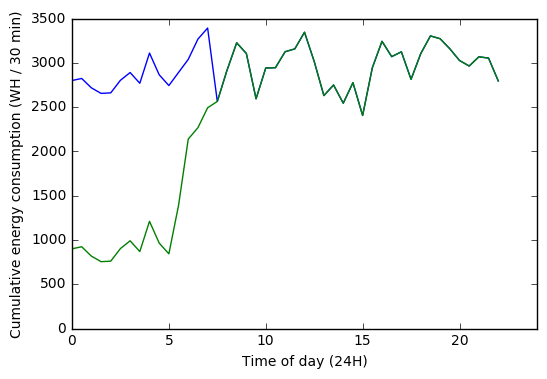

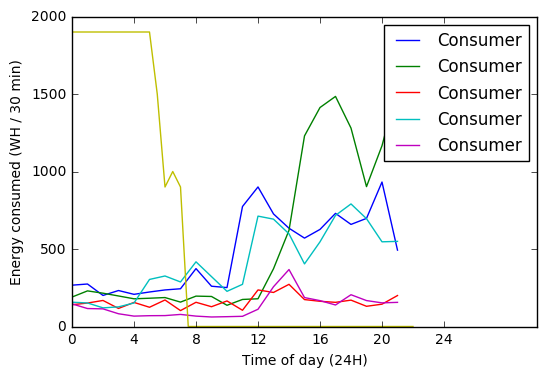

In [46]:
#choice = numpy.random.choice(range(25), size=5, replace=False)
choice = array([15,  9, 13,  3, 24])  # Flat profile
#choice = array([19,  3, 21, 17, 22])
time = np.array(range(45))/2.0
#time = time.reshape(len(time),1)
cumload = jgrpavg.iloc[choice,3:].sum(0).values
solcap = 400
solarcap = solcap*solar[:45]
solar_cum = np.array([0])
for i in range(1,len(solarcap)):
    solar_cum = np.append(solar_cum,[solarcap[i]+solar_cum[i-1]])
delta = solar_cum-cumload
deltapos = zeros(len(delta))
deltaneg = zeros(len(delta))
for i in range(len(delta)):
    if delta[i] >= 0:
        deltapos[i] = delta[i]
    else:
        deltaneg[i] = -delta[i]
batt = np.zeros(len(delta))
for i in range(len(batt)):
    if i < 11: batt[i] = 1900
    if i == 11: batt[i] = 1500
    if i == 12: batt[i] = 900
    if i == 13: batt[i] = 1000
    if i == 14: batt[i] = 900
figure()
plt.plot(time,cumload+batt)
plt.plot(time,cumload)
plt.xlabel('Time of day (24H)')
plt.ylabel('Cumulative energy consumption (WH / 30 min)')
#plt.plot(time,solarcap)
#plt.plot(time,solar_cum)
#plt.plot(time,deltapos)
#plt.plot(time,deltaneg)
plt.axis([0,24,0,None])
figure()
plt.plot(jgrpavg.iloc[choice,3:25].values.T,label = 'Consumer');
plt.axis([0,30,None,2000])
plt.plot(time,batt)
plt.axis([0,30,0,None])
plt.xlabel('Time of day (24H)')
plt.xticks([0,4,8,12,16,20,24])
plt.ylabel('Energy consumed (WH / 30 min)')
plt.legend()

In [7]:
choice

array([19,  3, 21, 17, 22])